<a href="https://colab.research.google.com/github/Asha-Nair2020/techmaster-Asha/blob/master/Credit_Card_Fraud_Detection_Asha_Nair_DS_C16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>Credit Card Fraud Detection</center></h2> 
                                                                                                                                                                                                                                                                                                                             

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Background:</b></label> 

<p style="text-align:justify"><b>Finex</b> is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.</p>


 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Context:</b></label> 
 
 Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.  Apart from this, other ways of making fraudulent transactions are as follows:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Stolen or lost credit cards
- Fraudulent telemarketing
 

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Problem Statement:</b></label> 
 
 - To identify the root cause of unauthorized transactions of credit cards and recommend ways to mitigate them
 
 - To develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Pipeline:</b></label> 

1. Data Understanding:Reading and Inspection
2. Exploratory data analytics
3. Train/Test Data Splitting
4. Model Building or Hyperparameter Tuning
5. Model Evaluation
6. Business Impact

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1. Import Libraries & Data Reading 

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the train and test data

#Train_data:

credit_train=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fraudTrain.csv")
credit_train.head()



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
credit_test=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fraudTest.csv")
credit_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# Determine the number of rows and columns in the data
print("The shape of the train dataset obtained from kaggle is",credit_train.shape)
print("The shape of the test dataset obtained from kaggle is",credit_test.shape)

The shape of the train dataset obtained from kaggle is (1296675, 23)
The shape of the test dataset obtained from kaggle is (555719, 23)


In [8]:
credit_final=pd.concat([credit_train, credit_test], axis = 0)
credit_final.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
#The column 'Unnamed: 0' and the indices does not seem to add any value. Therefore it is good to drop them.

credit_final.drop(['Unnamed: 0'], axis=1,inplace=True)



In [10]:
#Drop the index column
credit_final.reset_index(drop=True, inplace=True)


In [11]:
# check if the operation is completed

credit_final.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
## Creating a copy of the final dataframe for operations in the future

credit_final_copy=credit_final.copy()
credit_final_copy.tail(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


<b>Let's merge the datasets before further inspection</b>

In [13]:
credit_final.shape

(1852394, 22)

In [14]:
print("The shape of the final dataset for analysis and model building is {}".format(credit_final.shape))

The shape of the final dataset for analysis and model building is (1852394, 22)


<b>Summary: </b>

1. The train and test data obtained from kaggle are concatenated with credit_train on top of credit_test for further operations.
2. The shape of the combined dataset is (1852394, 22)

### 2. Data Cleaning

In [15]:
credit_final.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
# Dropping columns which will not add value to the model building process
 
credit_final.drop(['first', 'last','dob','unix_time','job','lat','long','state','gender','zip','street'], axis=1,inplace=True)


In [17]:
credit_final.drop(['trans_num'], axis=1,inplace=True)

In [18]:
# Split 'trans_date_trans_time' into trans_date and trans_time

credit_final['Transaction_date']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[0])
credit_final['Transaction_Time']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[1])


In [19]:
credit_final["Transaction_Time"]= pd.to_datetime(credit_final["Transaction_Time"]).dt.time

In [20]:
credit_final["Transaction_date"]= pd.to_datetime(credit_final["Transaction_date"])

In [21]:
# The feature 'merchant' has '_fraud' in the beginning of every string. Lets get rid of it. 

credit_final['merchant']=credit_final['merchant'].apply(lambda x:x.split('_')[1])

In [22]:
credit_final.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,city,city_pop,merch_lat,merch_long,is_fraud,Transaction_date,Transaction_Time
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,36.011293,-82.048315,0,2019-01-01,00:00:18
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Malad City,4154,43.150704,-112.154481,0,2019-01-01,00:00:51


In [23]:
credit_final.drop(['trans_date_trans_time'], axis=1,inplace=True)

In [24]:
credit_final['Transaction_Hour']=credit_final['Transaction_Time'].astype(str).str[:2]
credit_final.head(50)

,cc_num,merchant,category,amt,city,city_pop,merch_lat,merch_long,is_fraud,Transaction_date,Transaction_Time,Transaction_Hour
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,36.011293,-82.048315,0,2019-01-01,00:00:18,00
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,49.159047,-118.186462,0,2019-01-01,00:00:44,00
2,38859492057661,Lind-Buckridge,entertainment,220.11,Malad City,4154,43.150704,-112.154481,0,2019-01-01,00:00:51,00
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,1939,47.034331,-112.561071,0,2019-01-01,00:01:16,00
4,375534208663984,Keeling-Crist,misc_pos,41.96,Doe Hill,99,38.674999,-78.632459,0,2019-01-01,00:03:06,00
5,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Dublin,2158,40.653382,-76.152667,0,2019-01-01,00:04:08,00
6,30074693890476,Rowe-Vandervort,grocery_net,44.54,Holcomb,2691,37.162705,-100.153370,0,2019-01-01,00:04:42,00
7,6011360759745864,Corwin-Collins,gas_transport,71.65,Edinburg,6018,38.948089,-78.540296,0,2019-01-01,00:05:08,00
8,4922710831011201,Herzog Ltd,misc_pos,4.27,Manor,1472,40.351813,-79.958146,0,2019-01-01,00:05:18,00
9,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Clarksville,151785,37.179198,-87.485381,0,2019-01-01,00:06:01,00


In [25]:
#Create a name column called Time_range to bucket the transaction hours

conditions=[
            
            (credit_final['Transaction_Hour'].astype(float)>=22) | (credit_final['Transaction_Hour'].astype(float)<4),
            (credit_final['Transaction_Hour'].astype(int)>=4) & (credit_final['Transaction_Hour'].astype(int)< 10),
            (credit_final['Transaction_Hour'].astype(int)>=10) & (credit_final['Transaction_Hour'].astype(int)<16),
            (credit_final['Transaction_Hour'].astype(int)>=16) & (credit_final['Transaction_Hour'].astype(int)<22)
             
          ]

values=['10 pm - 4 am','4 am - 10 am','10 am - 4 pm','4 pm - 10 pm' ]

credit_final['Trans_time_range']=np.select(conditions,values)

credit_final.head(10)

,cc_num,merchant,category,amt,city,city_pop,merch_lat,merch_long,is_fraud,Transaction_date,Transaction_Time,Transaction_Hour,Trans_time_range
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,36.011293,-82.048315,0,2019-01-01,00:00:18,00,10 pm - 4 am
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,49.159047,-118.186462,0,2019-01-01,00:00:44,00,10 pm - 4 am
2,38859492057661,Lind-Buckridge,entertainment,220.11,Malad City,4154,43.150704,-112.154481,0,2019-01-01,00:00:51,00,10 pm - 4 am
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,1939,47.034331,-112.561071,0,2019-01-01,00:01:16,00,10 pm - 4 am
4,375534208663984,Keeling-Crist,misc_pos,41.96,Doe Hill,99,38.674999,-78.632459,0,2019-01-01,00:03:06,00,10 pm - 4 am
5,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Dublin,2158,40.653382,-76.152667,0,2019-01-01,00:04:08,00,10 pm - 4 am
6,30074693890476,Rowe-Vandervort,grocery_net,44.54,Holcomb,2691,37.162705,-100.153370,0,2019-01-01,00:04:42,00,10 pm - 4 am
7,6011360759745864,Corwin-Collins,gas_transport,71.65,Edinburg,6018,38.948089,-78.540296,0,2019-01-01,00:05:08,00,10 pm - 4 am
8,4922710831011201,Herzog Ltd,misc_pos,4.27,Manor,1472,40.351813,-79.958146,0,2019-01-01,00:05:18,00,10 pm - 4 am
9,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Clarksville,151785,37.179198,-87.485381,0,2019-01-01,00:06:01,00,10 pm - 4 am


In [26]:
credit_final['Trans_time_range'].where(credit_final.is_fraud==1).value_counts()

10 pm - 4 am    8169
4 pm - 10 pm     606
10 am - 4 pm     489
4 am - 10 am     387
Name: Trans_time_range, dtype: int64

In [27]:
credit_final.drop(['Transaction_Time','Transaction_Hour'],axis=1,inplace=True)


In [47]:
conditions_city=[
            
            (credit_final['city_pop']<5000),
            (credit_final['city_pop']>=5000) & (credit_final['city_pop']< 200000),
            (credit_final['city_pop']>=200000) & (credit_final['city_pop']< 1000000),
            (credit_final['city_pop']>=1000000) & (credit_final['city_pop']<1500000),
            (credit_final['city_pop']>=1500000)   
          ]

values_city=['Very Small','Small','Medium','Large','Very Large' ]

credit_final['City_Size']=np.select(conditions_city,values_city)

credit_final.head(10)

,cc_num,merchant,category,amt,city,city_pop,merch_lat,merch_long,is_fraud,Transaction_date,Trans_time_range,City_Size
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,36.011293,-82.048315,0,2019-01-01,10 pm - 4 am,Very Small
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,49.159047,-118.186462,0,2019-01-01,10 pm - 4 am,Very Small
2,38859492057661,Lind-Buckridge,entertainment,220.11,Malad City,4154,43.150704,-112.154481,0,2019-01-01,10 pm - 4 am,Very Small
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,1939,47.034331,-112.561071,0,2019-01-01,10 pm - 4 am,Very Small
4,375534208663984,Keeling-Crist,misc_pos,41.96,Doe Hill,99,38.674999,-78.632459,0,2019-01-01,10 pm - 4 am,Very Small
5,4767265376804500,"Stroman, Hudson and Erdman",gas_transport,94.63,Dublin,2158,40.653382,-76.152667,0,2019-01-01,10 pm - 4 am,Very Small
6,30074693890476,Rowe-Vandervort,grocery_net,44.54,Holcomb,2691,37.162705,-100.153370,0,2019-01-01,10 pm - 4 am,Very Small
7,6011360759745864,Corwin-Collins,gas_transport,71.65,Edinburg,6018,38.948089,-78.540296,0,2019-01-01,10 pm - 4 am,Small
8,4922710831011201,Herzog Ltd,misc_pos,4.27,Manor,1472,40.351813,-79.958146,0,2019-01-01,10 pm - 4 am,Very Small
9,2720830304681674,"Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Clarksville,151785,37.179198,-87.485381,0,2019-01-01,10 pm - 4 am,Small


In [60]:
filter1=credit_final['city']=='Houston'
filter2=credit_final['is_fraud']==1

credit_final['City_Size'].where(filter1 & filter2).value_counts()

Very Large    39
Name: City_Size, dtype: int64

In [44]:
credit_final['Trans_time_range'].where(credit_final.Trans_time_range=='10 pm - 4 am').value_counts()

10 pm - 4 am    435021
Name: Trans_time_range, dtype: int64

In [36]:
credit_final.loc[credit_final['city_pop']]

Utica                        7309
Conway                       6574
Cleveland                    6572
Thomas                       6571
Arcadia                      5850
Fulton                       5841
Burbank                      5831
Hudson                       5123
Fort Washakie                5116
Lahoma                       5116
Andrews                      5107
Orient                       5093
Lomax                        4392
Clarks Mills                 4392
Thompson                     4386
Walnut Ridge                 4386
De Witt                      4385
Uledi                        4384
Edisto Island                4384
Kingsford Heights            4384
Cottekill                    4384
Hinesburg                    4383
Superior                     4383
East Canaan                  4382
Shields                      4381
Hinckley                     4380
Jones                        4380
Centerview                   4380
Bradley                      4380
Rocky Mount   

In [30]:

print("Minimum value of cc_num is {}".format(credit_final['cc_len'].min()))
print("Maximum value of cc_num is {}".format(credit_final['cc_len'].max()))

KeyError: ignored

Since the numbers of credit cards lie between the length 8 and 19, they are valid.

In [142]:
credit_final.drop(['cc_len'], axis=1,inplace=True)

In [137]:
# Inspecting Data Types 

credit_final.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   cc_num            int64         
 1   merchant          object        
 2   category          object        
 3   amt               float64       
 4   city              object        
 5   city_pop          int64         
 6   merch_lat         float64       
 7   merch_long        float64       
 8   is_fraud          int64         
 9   Transaction_date  datetime64[ns]
 10  Transaction_Time  object        
 11  cc_len            int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 169.6+ MB


In [138]:
# Change the data type of some features to appropriate types

credit_final["cc_num"]= credit_final["cc_num"].astype(object)

# credit_final["merch_lat"]= credit_final["merch_lat"].astype(object)
# credit_final["merch_long"]= credit_final["merch_long"].astype(object)


credit_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   cc_num            object        
 1   merchant          object        
 2   category          object        
 3   amt               float64       
 4   city              object        
 5   city_pop          int64         
 6   merch_lat         object        
 7   merch_long        object        
 8   is_fraud          int64         
 9   Transaction_date  datetime64[ns]
 10  Transaction_Time  object        
 11  cc_len            int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 169.6+ MB


In [143]:
# Missing Values Inspection

credit_final.isnull().sum()

cc_num              0
merchant            0
category            0
amt                 0
city                0
city_pop            0
merch_lat           0
merch_long          0
is_fraud            0
Transaction_date    0
Transaction_Time    0
dtype: int64

In [144]:
credit_final[['amt','city_pop']].describe([0.25,0.40,0.50,0.75,0.90,0.95,0.99,0.999]).apply(lambda x:x.apply('{0:.2f}'.format))

,amt,city_pop
count,1852394.00,1852394.00
mean,70.06,88643.67
std,159.25,301487.62
min,1.00,23.00
25%,9.64,741.00
40%,32.08,1628.00
50%,47.45,2443.00
75%,83.10,20328.00
90%,136.33,186140.00
95%,195.34,525713.00


<b>The statistical summary suggests the presence of outliers. </b>

In [145]:
# Let's have a look at the cleaned dataset

credit_final.head()

,cc_num,merchant,category,amt,city,city_pop,merch_lat,merch_long,is_fraud,Transaction_date,Transaction_Time
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,36.0113,-82.0483,0,2019-01-01,00:00:18
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,49.159,-118.186,0,2019-01-01,00:00:44
2,38859492057661,Lind-Buckridge,entertainment,220.11,Malad City,4154,43.1507,-112.154,0,2019-01-01,00:00:51
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,1939,47.0343,-112.561,0,2019-01-01,00:01:16
4,375534208663984,Keeling-Crist,misc_pos,41.96,Doe Hill,99,38.675,-78.6325,0,2019-01-01,00:03:06


<b>Summary: </b>
1. There are no missing values in the dataset
2. All the columns which did not add value to the analysis and modelling were dropped
3. The trans_date_trans_time column was split into two to get transaction date and transaction time separately for analysis.

<b>Conclusion</b>: The data has been cleaned and is ready for analysis

### 3. Exploratory Data Analysis

In [146]:
# Check Data Imbalance

print(credit_final['is_fraud'].value_counts()/len(credit_final)*100)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


<b> The dataset is highly imbalanced with just 0.52% fraudulent transactions.</b>

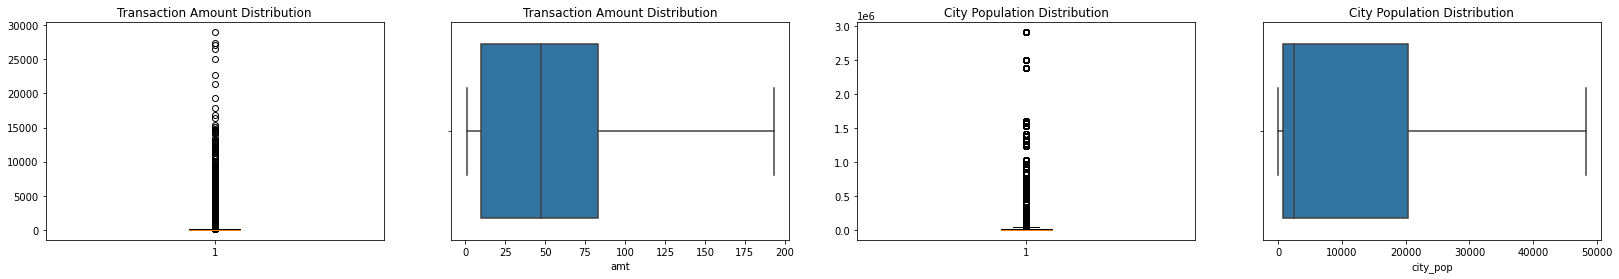

In [147]:
# Identify Outliers

plt.subplot(141)
plt.boxplot(credit_final['amt'])
plt.title("Transaction Amount Distribution")

plt.subplots_adjust(left=0.4,right=4)


plt.subplot(142)
sns.boxplot(credit_final['amt'],showfliers=False)
# plt.yscale('log')
plt.title("Transaction Amount Distribution")

plt.subplot(143)
plt.boxplot(credit_final['city_pop'])
plt.title("City Population Distribution")


plt.subplot(144)
sns.boxplot(credit_final['city_pop'],showfliers=False)
# plt.yscale('log')
plt.title("City Population Distribution")


plt.show()

The plots of transaction amount and City Population suggest large number of outliers in both the features. These will be treated using the appropriate methods below

**Outlier Treatment**

In [148]:


# 1. credit_final['amt]
## Method used: Capping using IQR method

#Step 1: Defining upper and lower bounds

q1=credit_final['amt'].quantile(0.25)
q3=credit_final['amt'].quantile(0.999)
print("The first quantile,Q1, of the amount feature is",q1,'/n',"The third quantile,Q3, of the amount feature is",q3)

iqr=q3=q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)


#Step 2. Capping the outliers
credit_final.loc[(credit_final['amt']>upper_bound),'amt']=upper_bound


The first quantile,Q1, of the amount feature is 9.64 /n The third quantile,Q3, of the amount feature is 1517.2410500000465
Upper Bound: 24.1
Lower Bound: -4.82


In [149]:
# 2. City Population
## Method used: Binning

#Step 1: Defining upper and lower bounds

q1=credit_final['city_pop'].quantile(0.25)
q3=credit_final['city_pop'].quantile(0.99)
print("The first quantile,Q1, of the city population feature is",q1,"\n","The third quantile,Q3, of the city population feature is",q3)

# Inspecting the records which are flagged as fraud 

pop_outliers=credit_final[(credit_final['city_pop']>q3)]
pop_outliers_fraud=pop_outliers.loc[pop_outliers['is_fraud']==1]
pop_outliers_fraud.sort_values(by='city_pop',ascending=False).count()

The first quantile,Q1, of the city population feature is 741.0 
 The third quantile,Q3, of the city population feature is 1577385.0


cc_num              83
merchant            83
category            83
amt                 83
city                83
city_pop            83
merch_lat           83
merch_long          83
is_fraud            83
Transaction_date    83
Transaction_Time    83
dtype: int64

As large as 83 fraudulent transactions have happened even at the 99th percentile. Capping or deleting records will make us lose data. Hence, going ahead with binning.


In [150]:
#Step 2. Binning

credit_final['City_Pop_Bins']=pd.cut(credit_train['city_pop'],[-1,741,2443,186140,525713,2906700],labels=['Very Low','Low','Medium','High','Very High'])
round(credit_final['City_Pop_Bins'].value_counts(normalize=True)*100,2)

Medium       40.15
Very Low     24.98
Low          24.97
High          4.99
Very High     4.91
Name: City_Pop_Bins, dtype: float64

In [151]:
# Now a new column indicating the population of cities is created, city_pop can be dropped. 

credit_final.drop('city_pop',axis=1,inplace=True)

In [152]:
#Test for Skewness
credit_final.skew()

cc_num         2.851074
amt           -0.992557
merch_lat     -0.188097
merch_long    -1.143933
is_fraud      13.745675
dtype: float64

#### 3.1 Univariate Analysis

In [99]:
# Find the unique values in each feature
print("Conclusion:")
print("The unique values in credit card numbers are {}".format(credit_final['cc_num'].nunique()))
print("The unique merchants are {}".format(credit_final['merchant'].nunique()))
print("The unique values in categories are {}".format(credit_final['category'].nunique()))
print("The unique values in cities are {}".format(credit_final['city'].nunique()))



Conclusion:
The unique values in credit card numbers are 999
The unique merchants are 693
The unique values in categories are 14
The unique values in cities are 906


Such large number of unique values will be difficult to deal with during model building process. Therefore it is essential to label them into appropriate categories for ease of model building.

The unique values of credit card numbers is only 999 in a dataset with over 180,0000 rows which cleearly indicates multiple transactions made by the same customer at various merchants in 14 categories of shopping

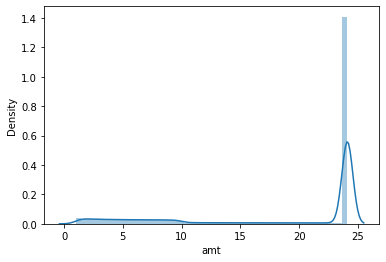

In [104]:
sns.distplot(credit_final['amt'])
plt.show()

The amount feature is highly skewed to the left

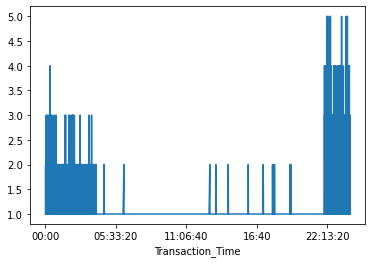

In [105]:
#Inspect the transaction timing when fraudulent transactions occur
#When is_fraud=1 vs transaction_time

#This dataframe only has pencils
df_fraud = credit_final[credit_final.is_fraud == 1]

#df_fraud.groupby('Transaction_Time').agg('is_fraud').count().plot(kind='line', x='Transaction_Time', y='is_fraud')
df_fraud.groupby('Transaction_Time').agg('is_fraud').count().plot( x='Transaction_Time', y='is_fraud')
#df_fraud.plot(kind='line', x='Transaction_Time', y='is_fraud')


 The plot between the transaction time and number of fraudulent transactions suggest that the highest number of frauds happened between 10 pm to around 5:00 pm. This is when the bank has to be most alert. 

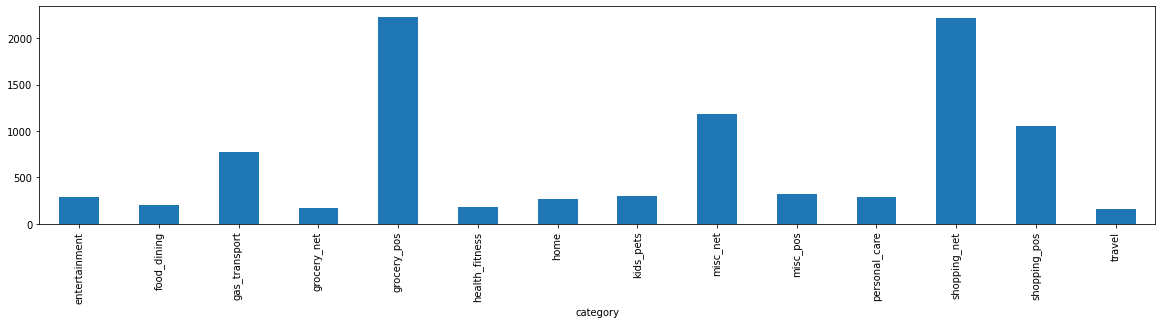

In [106]:
# Category vs is_fraud

plt.figure(figsize=(20,4))
df_fraud.groupby('category').agg('is_fraud').count().plot(kind='bar',x='merchant', y='is_fraud')


The bar chart above suggests there are highest number of fraudulent transactions happening at grocery Point of Sale followed by  internet shopping.

In [107]:
# City of highest fraudlent transactions

risk_city=df_fraud.city.value_counts()
print("A high number of fraudulent transactions have happened in the following cities:","\n",risk_city.head(10))
print("The least number of fraudulent transactions have happened in the following cities:","\n",risk_city.tail(5))

A high number of fraudulent transactions have happened in the following cities: 
 Dallas           39
Houston          39
Birmingham       36
New York City    35
Allentown        34
Camden           34
Detroit          33
Warren           33
Washington       31
Arcadia          30
Name: city, dtype: int64
The least number of fraudulent transactions have happened in the following cities: 
 Littleton      2
Kilgore        2
Laramie        2
Phenix City    2
Sherman        2
Name: city, dtype: int64


In [61]:
risk_city.describe()

NameError: ignored

In [108]:
# Find the merchants with highest frequency of fraud

risk_merchant=df_fraud.merchant.value_counts()
print("A high number of fraudulent transactions have happened at the following merchants:","\n",risk_merchant.head(10))
print("The least number of fraudulent transactions have happened in the following merchants:","\n",risk_merchant.tail(5))

A high number of fraudulent transactions have happened at the following merchants: 
 Kilback LLC                 62
Rau and Sons                60
Kozey-Boehm                 60
Doyle Ltd                   57
Terry-Huel                  56
Boyer PLC                   55
Kuhn LLC                    55
Moen, Reinger and Murphy    53
Cormier LLC                 53
Kuhic LLC                   53
Name: merchant, dtype: int64
The least number of fraudulent transactions have happened in the following merchants: 
 Rippin-VonRueden             1
Kub-Heaney                   1
Ortiz Group                  1
Parker, Nolan and Trantow    1
Romaguera and Sons           1
Name: merchant, dtype: int64


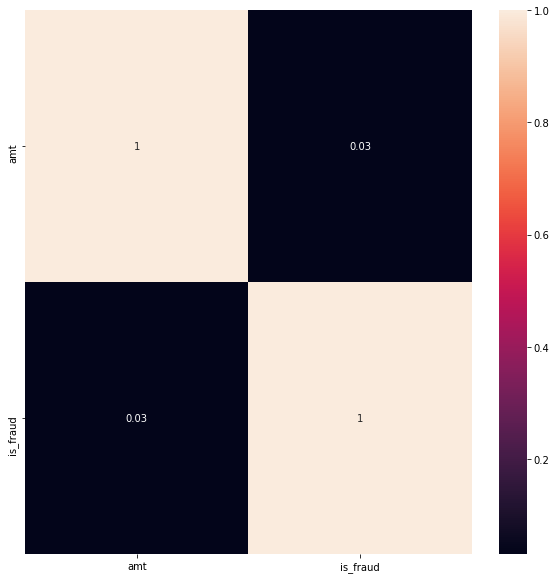

In [157]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(credit_final.corr(),annot = True)
plt.show()

### 3. Data Preparation

In [1]:
# Create Dummy variables

dummy1 = pd.get_dummies(credit_final[['category']], drop_first=True)


dummy1.head()

NameError: ignored